# Predict the claims

## PROBLEM STATEMENT

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

1. Risk management is the total process of identifying, controlling and minimizing the influence of uncertain events.

## Standard Libraries Used
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn
5. Scikit Learn
6. Subprocess
7. Warnings


## 1. Importing Libraries

In [1]:
import sys #access to system parameters
print("Python version: {}". format(sys.version))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
print("matplotlib version: {}". format(mpl.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
# import random
# import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


# Input data files are available in the "../data/" directory.

from subprocess import check_output
print(check_output(["ls", "./data/"]).decode("utf8"))


#Visualization
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.7.0 (default, Jun 28 2018, 13:15:42) 
[GCC 7.2.0]
NumPy version: 1.15.1
pandas version: 0.23.4
matplotlib version: 2.2.3
seaborn version: 0.9.0
scikit-learn version: 0.20.3
-------------------------
sample_submission.csv
test.csv
train.csv



## Defining Functions

In [2]:
def getcolumninfo(df,column_name):
    '''
    Functions prints the total length, number of null values, mean , mediad, mode, maximum value, Unique value
    Params: 
    df: Dataframe in pandas
    column_name: Column name expecting to be in string
    '''
    assert(isinstance(df,pd.DataFrame)), 'It should be dataframe instead of series'
    
    tf = {
        'column_name': column_name,
        'total_length': df[column_name].count(),
        'mean': df[column_name].mean(),
        'median' : df[column_name].median(),
        'min' : df[column_name].min(),
        'max' : df[column_name].max(),
        'unique_count' : len(df[column_name].unique())
    }
    
    tf = pd.DataFrame.from_dict(tf,orient='index',columns=['Details'])
    return tf

In [3]:
# Defining Distribution function
def drawdistchart(df,column_name, title='Distributed Plotting'):
    '''
    This function draw the Distribution chart for the particluar column
    Params: 
    df:  Dataframe
    column_name: Name of the column to be drawn
    '''
    title = title+' for '+ column_name
    assert(isinstance(df,pd.DataFrame)), 'It should be dataframe instead of series'
    sns.distplot(df[column_name])
    plt.title(title)
    plt.xlabel(column_name)
    plt.show()

In [4]:
# Count Plot
def get_class_counts(df, target, display='all', subtitle=None):
    """
    Plots a countplot of column.

    display options are number, percent or all

    """

    fig = plt.figure(figsize=(10,7))
    g = sns.countplot(df[target])

    for p in g.patches:
        if display == 'all':
            g.annotate('{}\n\n{:.2f}% \n'.format(p.get_height(), 100*p.get_height()/len(df)), (p.get_x(), p.get_height()+10), bbox=dict(boxstyle="round",alpha=0.1, color='grey'))
        elif display=='number':
            g.annotate('{}'.format(p.get_height()),(p.get_x(), p.get_height()+10), bbox=dict(boxstyle="round",alpha=0.1, color='grey'))
        elif display=='percent':
            g.annotate('{:.2f}% \n'.format(100*p.get_height()/len(df)), (p.get_x(), p.get_height()+10), bbox=dict(boxstyle="round",alpha=0.1, color='grey'))
        else:
            raise ValueError('Display must be either of number, percent or all')
    g.set_ylim(0, max([p.get_height()*1.15 for  p in g.patches]))
    g.text(x=.5, y=1.07,s=f'Count plot of {target}',fontsize=16, weight='bold',ha='center',va='bottom',transform=g.transAxes, color='Navy')


    if subtitle:
        g.text(x=0.5, y=1.03, s=f'{subtitle}', fontsize=12,alpha=.75,ha='center',va='bottom',transform=g.transAxes, color='darkblue')
    if any([p.get_height()/len(df)< 0.2 for p in g.patches]):
        fig.text(x=1,y=.5,s='Imbalance exists in datasets', bbox=dict(boxstyle="round",alpha=0.7, color='green'), color='white', fontsize=14)
    else:
        fig.text(x=1, y=0.5, s='Balaned datasets', bbox=dict(boxstyle="round",alpha=0.7, color='green'), color='white', fontsize=14)
    plt.show()


## 2. Data Dictionary

A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 50660 customers and the test dataset consists of 12666 customers. Following are the features of the dataset

- Target: Claim Status (Claim.Status)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- The commission received for travel insurance agency (Commission)
- Gender of insured (Gender)
- Age of insured (Age)

In [5]:
# enter the file(csv, xls, etc.)
train_path = './data/train.csv'
test_path = './data/test.csv'

In [6]:
# Loading the dataset/sheet in the df variable
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [7]:
df = train_data.copy(deep = True)

In [8]:
data_cleaner = [df, test_data]

In [9]:
train_data.sample(10)

ID Agency    Agency Type Distribution Channel  \
24448  47399    C2B       Airlines               Online   
11570  17686    EPX  Travel Agency               Online   
17410  56543    CWT  Travel Agency               Online   
5472   13622    EPX  Travel Agency               Online   
41055  14257    EPX  Travel Agency               Online   
3966   57388    CWT  Travel Agency               Online   
44265   7283    EPX  Travel Agency               Online   
35238  27685    EPX  Travel Agency               Online   
39390   9258    JZI       Airlines               Online   
11688  21074    EPX  Travel Agency               Online   

                          Product Name  Claim  Duration  \
24448                      Bronze Plan      0        13   
11570                Cancellation Plan      0        11   
17410  Rental Vehicle Excess Insurance      0         9   
5472          2 way Comprehensive Plan      0        11   
41055                Cancellation Plan      0       163   
3966   Rental Vehicle Excess Insurance      0        26   
44265         2 way Comprehensive Plan      0        14   
35238                Cancellation Plan      0        64   
39390                       Basic Plan      0       287   
11688                Cancellation Plan      0        12   

                     Destination  Net Sales  Commision (in value) Gender  Age  
24448                  SINGAPORE       33.5                  8.38      F   58  
11570                  SINGAPORE       45.0                  0.00    NaN   36  
17410                  AUSTRALIA       59.4                 35.64    NaN   31  
5472                   SRI LANKA       27.0                  0.00    NaN   36  
41055         KOREA, REPUBLIC OF       45.0                  0.00    NaN   36  
3966                    THAILAND       29.7                 17.82    NaN   53  
44265  TAIWAN, PROVINCE OF CHINA       50.0                  0.00    NaN   36  
35238                     CANADA       77.0                  0.00    NaN   21  
39390         KOREA, REPUBLIC OF       35.0                 12.25      F   15  
11688                  INDONESIA       10.0                  0.00    NaN   36

In [10]:
#Optional 
pd.set_option('display.max_columns',50)

In [11]:
# Checking the number of rows and columns
print('Number of rows and column in Train datatset',format(train_data.shape))
print('-'*80)
print('Number of rows and column in Test datatset',format(test_data.shape))

Number of rows and column in Train datatset (50660, 12)
--------------------------------------------------------------------------------
Number of rows and column in Test datatset (12666, 11)


In [12]:
train_data.head()

ID Agency    Agency Type Distribution Channel  \
0   3433    CWT  Travel Agency               Online   
1   4339    EPX  Travel Agency               Online   
2  34590    CWT  Travel Agency               Online   
3  55816    EPX  Travel Agency               Online   
4  13816    EPX  Travel Agency               Online   

                      Product Name  Claim  Duration         Destination  \
0  Rental Vehicle Excess Insurance      0         7            MALAYSIA   
1                Cancellation Plan      0        85           SINGAPORE   
2  Rental Vehicle Excess Insurance      0        11            MALAYSIA   
3         2 way Comprehensive Plan      0        16           INDONESIA   
4                Cancellation Plan      0        10  KOREA, REPUBLIC OF   

   Net Sales  Commision (in value) Gender  Age  
0        0.0                 17.82    NaN   31  
1       69.0                  0.00    NaN   36  
2       19.8                 11.88    NaN   75  
3       20.0                  0.00    NaN   32  
4       15.0                  0.00    NaN   29

In [13]:
# Test Data
test_data.head()

ID Agency    Agency Type Distribution Channel  \
0  25902    CWT  Travel Agency               Online   
1  19535    EPX  Travel Agency               Online   
2  43717    EPX  Travel Agency               Online   
3  48271    EPX  Travel Agency               Online   
4  52318    EPX  Travel Agency               Online   

                      Product Name  Duration Destination  Net Sales  \
0  Rental Vehicle Excess Insurance        58     ICELAND       49.5   
1         2 way Comprehensive Plan         4   SINGAPORE       20.0   
2         2 way Comprehensive Plan        68    VIET NAM       20.0   
3         2 way Comprehensive Plan        41       CHINA       28.0   
4                Cancellation Plan        16   SINGAPORE       11.0   

   Commision (in value) Gender  Age  
0                  29.7    NaN   47  
1                   0.0    NaN   24  
2                   0.0    NaN   36  
3                   0.0    NaN   36  
4                   0.0    NaN   36

In [14]:
# Checking Train Columns
train_data.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [15]:
# Checking Test Columns
test_data.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [16]:
# Checking stats of the column
train_data.describe().T

count          mean           std    min       25%  \
ID                    50660.0  31674.458014  18289.180100    0.0  15883.75   
Claim                 50660.0      0.014647      0.120135    0.0      0.00   
Duration              50660.0     49.413383    101.354774   -2.0      9.00   
Net Sales             50660.0     40.837350     48.884947 -389.0     18.00   
Commision (in value)  50660.0      9.834257     19.904720    0.0      0.00   
Age                   50660.0     40.008231     14.074357    0.0     35.00   

                          50%       75%      max  
ID                    31646.5  47543.25  63325.0  
Claim                     0.0      0.00      1.0  
Duration                 22.0     53.00   4881.0  
Net Sales                27.0     48.50    810.0  
Commision (in value)      0.0     11.55    283.5  
Age                      36.0     44.00    118.0

In [17]:
# Checking stats of the column
test_data.describe().T

count          mean           std    min       25%  \
ID                    12666.0  31614.671720  18247.815862    7.0  15616.75   
Duration              12666.0     48.931865    103.523330   -1.0      9.00   
Net Sales             12666.0     40.160731     48.686258 -357.5     18.00   
Commision (in value)  12666.0      9.712940     19.398376    0.0      0.00   
Age                   12666.0     39.816990     13.784741    1.0     35.00   

                          50%       75%       max  
ID                    31754.5  47287.75  63322.00  
Duration                 22.0     52.00   4847.00  
Net Sales                26.5     47.00    586.00  
Commision (in value)      0.0     11.55    210.21  
Age                      36.0     43.00    118.00

In [18]:
# Checking training datatypes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 12 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null object
Distribution Channel    50660 non-null object
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null int64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [19]:
# Checking testing datatypes
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12666 entries, 0 to 12665
Data columns (total 11 columns):
ID                      12666 non-null int64
Agency                  12666 non-null object
Agency Type             12666 non-null object
Distribution Channel    12666 non-null object
Product Name            12666 non-null object
Duration                12666 non-null int64
Destination             12666 non-null object
Net Sales               12666 non-null float64
Commision (in value)    12666 non-null float64
Gender                  3605 non-null object
Age                     12666 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


**Checking Null Values**

In [20]:
# Checking null values in the dataset
null_values = pd.DataFrame(train_data.isnull().sum(),columns=['total_count'])
null_values

total_count
ID                              0
Agency                          0
Agency Type                     0
Distribution Channel            0
Product Name                    0
Claim                           0
Duration                        0
Destination                     0
Net Sales                       0
Commision (in value)            0
Gender                      36046
Age                             0

In [21]:
# Checking null values in the test dataset
null_values = pd.DataFrame(test_data.isnull().sum(),columns=['total_count'])
null_values

total_count
ID                              0
Agency                          0
Agency Type                     0
Distribution Channel            0
Product Name                    0
Duration                        0
Destination                     0
Net Sales                       0
Commision (in value)            0
Gender                       9061
Age                             0

In [22]:
round(null_values.loc[null_values['total_count'] > 0 , : ]['total_count']['Gender'] / len(train_data),2) * 100

18.0

From the above stats, We can observe `Gender` columns has null values more than `70%`, so we can drop the  columns, `since it won't help us to predict the model`

### Single Variate Analysis
_**Let's understand the data**_

In [23]:
# Train : ID column
getcolumninfo(train_data,'ID')

Details
column_name        ID
total_length    50660
mean          31674.5
median        31646.5
min                 0
max             63325
unique_count    50660

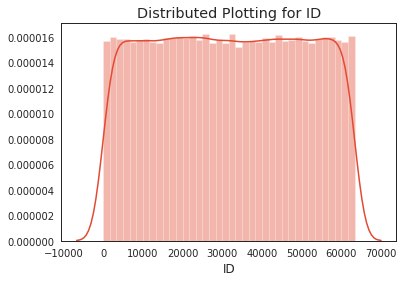

In [24]:
drawdistchart(train_data,'ID')

**From the above stats, we observed that all the values are unique**

In [25]:
# Train : b
train_data['Agency'].head()

0    CWT
1    EPX
2    CWT
3    EPX
4    EPX
Name: Agency, dtype: object

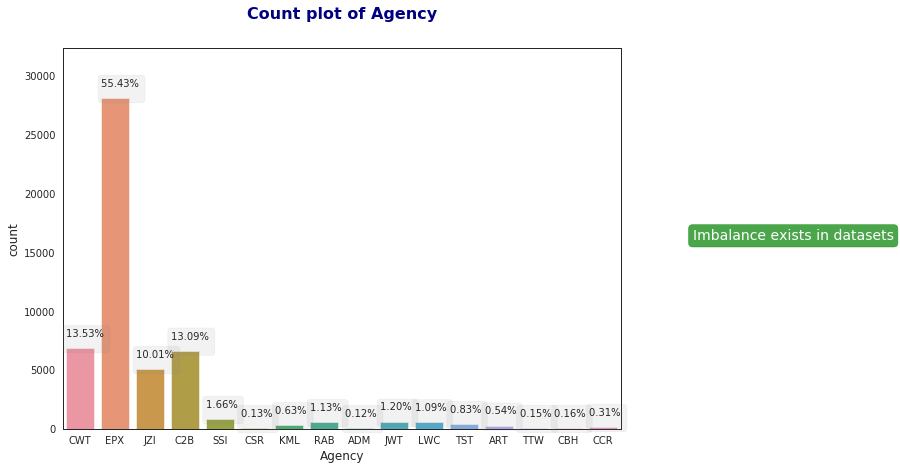

In [26]:
# train_data['Agency'].value_counts()
get_class_counts(train_data,'Agency',display='percent')
# get_class_counts()

**From the above stats, EPX Agency has the highest insurance providers, followed by CWT, JZI, C2B which ranges between 10% to 13%**

In [27]:
# Train column : Agency Type
# getcolumninfo(train_data,'Agency Type')
train_data['Agency Type'].head()

0    Travel Agency
1    Travel Agency
2    Travel Agency
3    Travel Agency
4    Travel Agency
Name: Agency Type, dtype: object

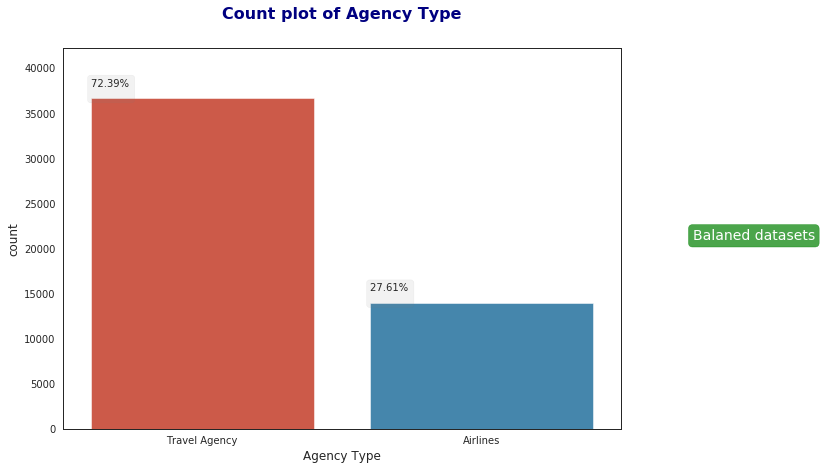

In [28]:
get_class_counts(train_data,'Agency Type',display='percent')

Agency Type is a binary column having only two values.

**Outcome:**
- **Travel agency is been the most type of preferred agency**


In [29]:
# Train : Distribution Channel
train_data['Distribution Channel'].value_counts()

Online     49770
Offline      890
Name: Distribution Channel, dtype: int64

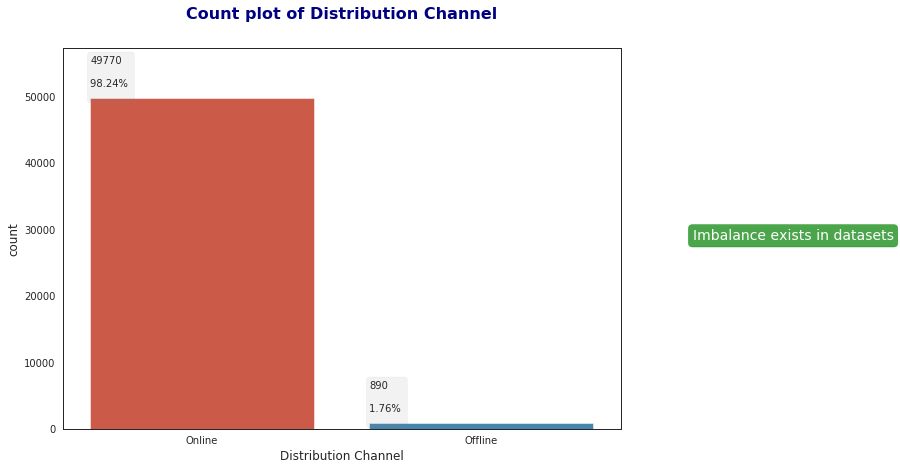

In [30]:
get_class_counts(train_data,'Distribution Channel')

Distribtuion Channel is a binary column having only two values which is online and offline

**Outcome:**
 - **Mostly Online has been preferred for insurancing**

In [31]:
# Train : Product Name 
train_data['Product Name'].head()

0    Rental Vehicle Excess Insurance
1                  Cancellation Plan
2    Rental Vehicle Excess Insurance
3           2 way Comprehensive Plan
4                  Cancellation Plan
Name: Product Name, dtype: object

In [32]:
product_name_uni = pd.DataFrame(round(train_data['Product Name'].value_counts() / 
                                      train_data['Product Name'].count(),4)*100)
product_name_uni

Product Name
Cancellation Plan                            29.46
2 way Comprehensive Plan                     20.73
Rental Vehicle Excess Insurance              13.53
Basic Plan                                    8.65
Bronze Plan                                   6.41
1 way Comprehensive Plan                      5.24
Value Plan                                    4.29
Silver Plan                                   3.53
Annual Silver Plan                            2.28
Ticket Protector                              1.66
Travel Cruise Protect                         0.83
Comprehensive Plan                            0.58
Gold Plan                                     0.58
24 Protect                                    0.39
Premier Plan                                  0.31
Single Trip Travel Protect Gold               0.31
Annual Gold Plan                              0.29
Single Trip Travel Protect Silver             0.26
Annual Travel Protect Gold                    0.16
Annual Travel Protect Silver                  0.14
Single Trip Travel Protect Platinum           0.12
Individual Comprehensive Plan                 0.11
Annual Travel Protect Platinum                0.09
Spouse or Parents Comprehensive Plan          0.02
Child Comprehensive Plan                      0.01
Travel Cruise Protect Family                  0.00

In [33]:
print(f'Total product {len(product_name_uni)}')

Total product 26


`Cancellation Plan` is the highest product been saled, followed by the `2 way Comprehensive Plan`, `Rental Vehicle Excess Insurance`

In [34]:
# Train Data: Duration
getcolumninfo(train_data,'Duration')

Details
column_name   Duration
total_length     50660
mean           49.4134
median              22
min                 -2
max               4881
unique_count       444

**Outcome : **
- **Duration has minimum value of -2, which cannot be possible, no can travel in past.**

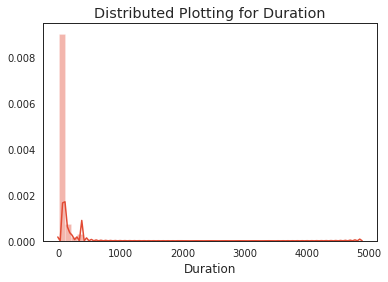

In [35]:
drawdistchart(train_data,'Duration')

- `Duration` column is right skewed.

**Outcome:**
 - `Duration` has been most during 1 to 10 days.

In [36]:
# Train Data: Destination
train_data['Destination'].head()

0              MALAYSIA
1             SINGAPORE
2              MALAYSIA
3             INDONESIA
4    KOREA, REPUBLIC OF
Name: Destination, dtype: object

In [37]:
# train_data['Destination'].value_counts()
destination_percent = pd.DataFrame(round(train_data['Destination'].value_counts() / 
                                      train_data['Destination'].count(),4)*100)
destination_count = pd.DataFrame(train_data['Destination'].value_counts())
destination_percent = destination_percent.join(destination_count,rsuffix='_count').sort_values(
    by=['Destination'],ascending=False)
destination_percent.rename(index=str, columns={"Destination": "percent", "Destination_count": "count"},inplace=True)
destination_percent.head(10)

percent  count
SINGAPORE        20.94  10608
MALAYSIA          9.37   4748
THAILAND          9.28   4699
CHINA             7.57   3836
AUSTRALIA         5.79   2934
INDONESIA         5.50   2786
UNITED STATES     3.98   2018
PHILIPPINES       3.95   1999
HONG KONG         3.83   1942
INDIA             3.51   1776

In [38]:
print(f'Total Destination: {len(destination_count)}')

Total Destination: 144


Outcome : 
- Singapore has the highest percentage of destination or Most insuranced placed is Singapore

In [39]:
# Train : Net Sales
getcolumninfo(train_data,'Net Sales')

Details
column_name   Net Sales
total_length      50660
mean            40.8374
median               27
min                -389
max                 810
unique_count       1053

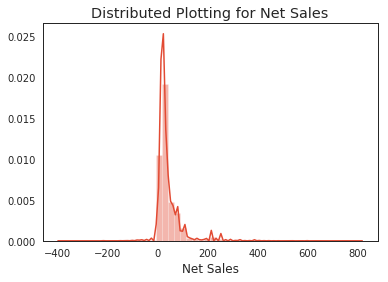

In [40]:
drawdistchart(train_data,'Net Sales')

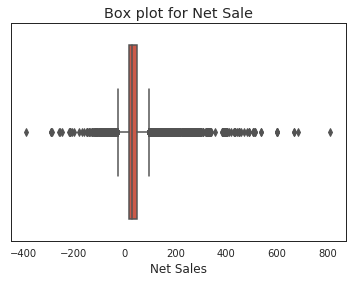

In [41]:
sns.boxplot(train_data['Net Sales'])
plt.title('Box plot for Net Sale')
plt.show()

**Outcome:**
- There are outliers in  the data which needed to be treated.
- Minimum value is -389.
- There has been values which are lesser than 0, due they are in loss

In [42]:
# Train : Commision (in value)
getcolumninfo(train_data,'Commision (in value)')

Details
column_name   Commision (in value)
total_length                 50660
mean                       9.83426
median                           0
min                              0
max                          283.5
unique_count                   968

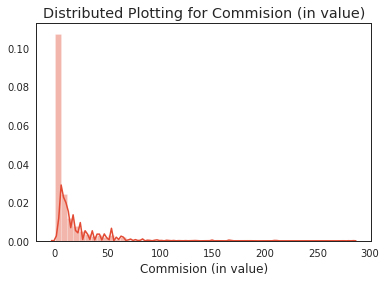

In [43]:
drawdistchart(train_data,'Commision (in value)')

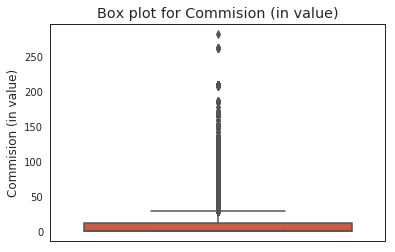

In [44]:
sns.boxplot(train_data['Commision (in value)'],orient="v")
plt.title('Box plot for Commision (in value)')
plt.show()

**Outcome:**
- There is no negative value.
- Data is right skewed.

In [45]:
# Train Data: Gender
train_data['Gender'].value_counts()

M    7537
F    7077
Name: Gender, dtype: int64

In [46]:
# getcolumninfo(train_data,'Gender')
round(train_data['Gender'].isnull().sum() / len(train_data['Gender']),4) * 100

71.15

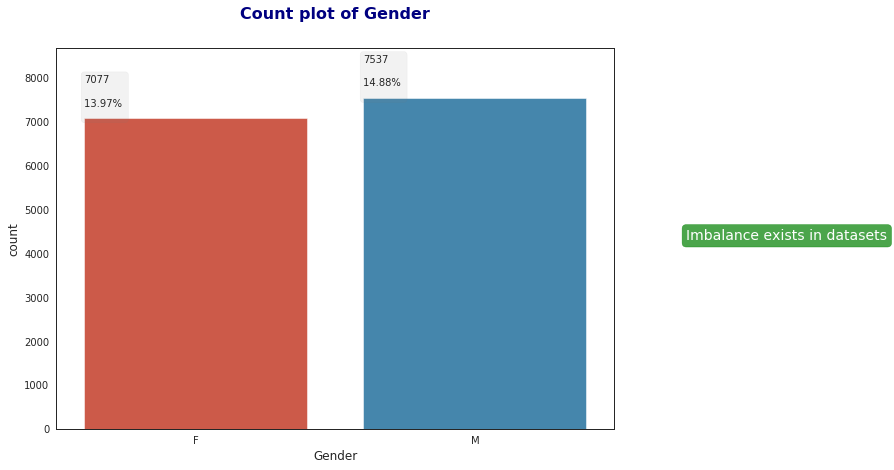

In [47]:
get_class_counts(train_data,'Gender')

Outcome:
1. There are null values.
2. Almost 72% of data gender is not specified.
3. Gender will not help us to predict the model.

In [48]:
#Train: Age
getcolumninfo(train_data,'Age')

Details
column_name       Age
total_length    50660
mean          40.0082
median             36
min                 0
max               118
unique_count       88

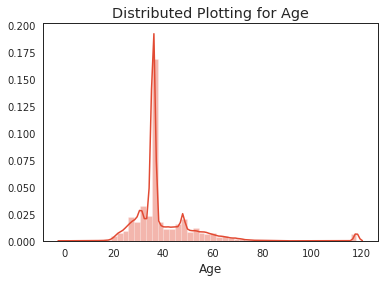

In [49]:
drawdistchart(train_data,'Age')

**Outcome:**
1. Age between from 20 to 60 has been have insured more.
2. There is outlier at the very right side of the 120

## Bivariate Analysis

**1. Check claim with agency. Which agency insurance get claim frequently.**

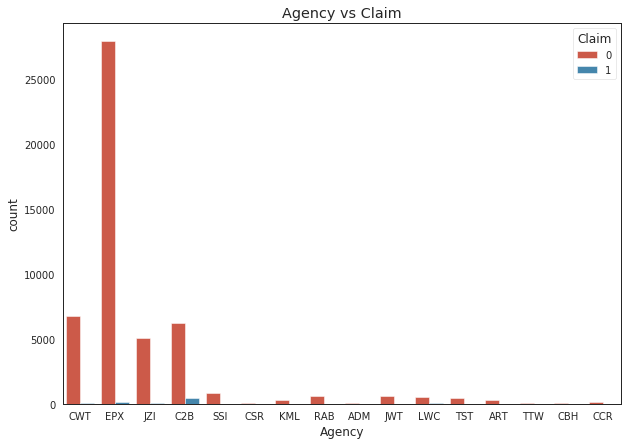

In [50]:
# fig , ax = plt.figure()
# fig = plt.figure(figsize=(10,7))
agency_bi = pd.DataFrame(train_data.groupby(by=['Agency','Claim'])['Claim'].count())
# agency_bi
fig = plt.figure(figsize=(10,7))
sns.countplot(x='Agency',hue='Claim',data=train_data)
plt.title('Agency vs Claim')
plt.show()

- C2B Agency has highest claim for the insurance.
- Number not claimed has is been by EPX.

In [51]:
train_claim_product_name = train_data[ (train_data['Claim'] == 1) ]['Product Name'].value_counts()
train_claim_product_name = pd.DataFrame(train_claim_product_name)
# train_data.groupby(by=['Claim'])
train_claim_product_name.head(10)

Product Name
Bronze Plan                               162
Annual Silver Plan                        128
Silver Plan                               118
2 way Comprehensive Plan                  112
Rental Vehicle Excess Insurance            68
Cancellation Plan                          33
Basic Plan                                 19
Annual Gold Plan                           17
Value Plan                                 15
Gold Plan                                  14

In [52]:
train_claim_product_name_c2b = train_data[ (train_data['Agency'] == 'C2B') & 
                                      (train_data['Claim'] == 1) ]
train_claim_product_name_c2b = pd.DataFrame(train_claim_product_name_c2b)
train_claim_product_name_c2b['Product Name'].value_counts()

Bronze Plan           162
Annual Silver Plan    128
Silver Plan           118
Annual Gold Plan       17
Gold Plan              14
Name: Product Name, dtype: int64

In [53]:
# train_path.loc[ train_claim_product_name_c2b.index.values ]
train_claim_product_name_c2b['Destination'].value_counts()

SINGAPORE    439
Name: Destination, dtype: int64

In [54]:
train_claim_product_name_c2b['Destination'].value_counts() / train_data['Claim'].value_counts()[1]

SINGAPORE    0.591644
Name: Destination, dtype: float64

In [55]:
train_claim_product_name_c2b['Agency Type'].value_counts()

Airlines    439
Name: Agency Type, dtype: int64

**Outcome:**
1. C2B has 5 product which(view above table) which are claimed.
2. Overall Product Claimed is also the same as C2B(top 3 products), which leads to a conclusion the any of these plan in C2B is been selled has more probability of getting claimed.
3. All the products claimed from C2B is only from the one Destination Singapore and Agency Type is Airlines.
4. Overall Claimed product from C2B which has destination SINGAPORE is 60%

**2. Check Agency Type with claim. Agency type with claim**

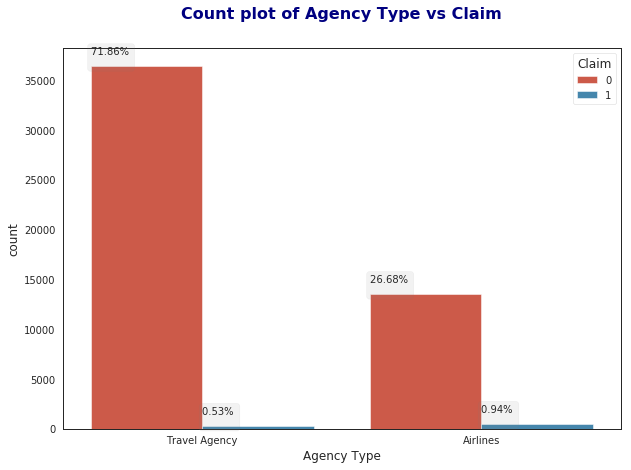

In [56]:
# train_data['Agency Type']
# sns.boxplot(train_data['Agency Type'],train_data['Claim'])
agency_type_claim = pd.crosstab(train_data['Agency Type'],train_data['Claim'])
# agency_type_claim['']

# fig , ax = plt.figure()
# fig = plt.figure(figsize=(10,7))
fig = plt.figure(figsize=(10,7))
g = sns.countplot(x='Agency Type',hue='Claim',data=train_data)
for p in g.patches:
    g.annotate('{:.2f}% \n'.format(100*p.get_height()/len(train_data)), (p.get_x(), p.get_height()+10), 
               bbox=dict(boxstyle="round",alpha=0.1, color='grey'))
g.text(x=.5, y=1.07,s=f'Count plot of Agency Type vs Claim',fontsize=16, weight='bold',ha='center',va='bottom',transform=g.transAxes, color='Navy')
plt.show()

Outcome: 
1. .53% of Travel agency is getting claimed.
2. .94% of Airlines agency is getting claimed.

In [57]:
train_data[(train_data['Agency Type'] == 'Airlines')  ]['Claim'].value_counts()

0    13514
1      474
Name: Claim, dtype: int64

In [58]:
train_data.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 50660 customers and the test dataset consists of 12666 customers. Following are the features of the dataset

- Target: Claim Status (Claim.Status)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- The commission received for travel insurance agency (Commission)
- Gender of insured (Gender)
- Age of insured (Age)

In [59]:
# train_data['Commision (in value)'].describe()

In [60]:
# train_data.columns

## Detecting Outliers

In [61]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [62]:
from sklearn.model_selection import train_test_split

In [72]:
# Appending test data in train data 
mergedata = train_data.append(test_data)

## Detecting Outlier

In [75]:
# Duration outlier
mergedata = mergedata.loc[mergedata['Duration'] >= 0 , :]

## Data Conversion

In [76]:
# Storing count variable of test data
testcount = len(test_data)

# Extracting test count from merge data
count = len(mergedata)-testcount

#Copying merge data into X_cat variable, to avoid the reference changes of data
X_cat = mergedata.copy()

# Selecting object datatype from mergedata
X_cat = mergedata.select_dtypes(include=['object'])

# Storing column names from data
X_cat_col = X_cat.columns.values

#Copying X_cat data into X_enc variable, to avoid the reference changes of data
X_enc = X_cat.copy()

# Dropping Gender column
X_enc.drop(columns=['Gender'],inplace=True)

# Dummfying the X_enc
X_enc = pd.get_dummies(X_enc)

#Dropping the Actual columns
mergedata = mergedata.drop(X_cat_col,axis=1)

# Storing all the data 
finaldata = pd.concat([mergedata,X_enc], axis=1)

In [77]:
# Extracting training data
train = finaldata[:count]

# Extracting testing data
test = finaldata[count:]

# Creating X and y variable for 
X = train.drop(['Claim'], axis=1)
y = train['Claim']

# Dropping target variable from test data
test = test.drop(['Claim'], axis=1)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3)
# X_train = X.copy()
# y_train = X_copy
# finaldata.columns.values

In [78]:
print('Train columns with null values: ', train.isnull().sum().sum())
print('Test/Validation columns with null values: ', test.isnull().sum().sum())

Train columns with null values:  0
Test/Validation columns with null values:  0


In [79]:
print('Shape of Train : ', train.shape)
print('Shape of Test : ', test.shape)

Shape of Train :  (50655, 201)
Shape of Test :  (12666, 200)


In [80]:
print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)
print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', test.shape)
print('Shape of y_test : ', test.shape)

Shape of X :  (50655, 200)
Shape of y :  (50655,)
Shape of X_train :  (35458, 200)
Shape of y_train :  (35458,)
Shape of X_test :  (12666, 200)
Shape of y_test :  (12666, 200)


In [81]:
# correlation_heatmap(train)
# train

## Modelling

In [82]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [87]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
#     ensemble.ExtraTreesClassifier(),
#     ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
#     gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
#     neighbors.KNeighborsClassifier(),
    
    #SVM
#     svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost 
#     XGBClassifier()    
    ]

1. The Claim variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for insurance claimed and 0 for did not claimed the insurance. All other variables are potential predictor or independent variables. **`It's important to note, more predictor variables do not make a better model, but the right variables.`**
2. The ID variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

In [88]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_compare

Empty DataFrame
Columns: [MLA Name, MLA Parameters, MLA Train Accuracy Mean, MLA Test Accuracy Mean, MLA Time]
Index: []

In [89]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, random_state = 0 )
cv_split

ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None)

In [ ]:
#create table to compare MLA predictions
MLA_predict = y_train.copy()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
#     print(alg)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv  = cv_split)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    # should statistically capture 99.7% of the subsets

    #let's know the worst that can happen!
#     MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   

    #save MLA predictions
    alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = alg.predict(test)
    
    row_index+=1
    print('Row', row_index)

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

Row 1


In [ ]:
X_train.columns

In [ ]:
# y_train

Text(0,0.5,'Algorithm')

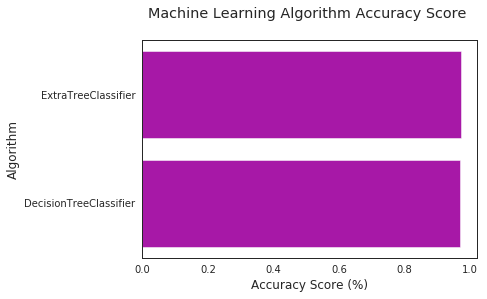

In [76]:

sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm',)

#prettify using pyplot
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [77]:
#why choose one model, when you can pick them all with voting classifier
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
#     ('ada', ensemble.AdaBoostClassifier()),
#     ('bc', ensemble.BaggingClassifier()),
#     ('etc',ensemble.ExtraTreesClassifier()),
#     ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes
#     ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM:
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies 
#     ('bnb', naive_bayes.BernoulliNB()),
#     ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM
    ('svc', svm.SVC(probability=True)),
    
    #xgboost
   ('xgb', XGBClassifier())

]





In [ ]:
# #Hard Vote or majority rules
# vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
# vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train, cv  = cv_split)
# vote_hard.fit(X_train,y_train)

# print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
# print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
# print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
# print('-'*10)

In [ ]:
#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train, cv  = cv_split)
vote_soft.fit(X_train, y_train)

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

In [ ]:
# Hyper parameter Tuning
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]
#Hyperparameter Tune with GridSearchCV


grid_param = [
#             [{
#             #AdaBoostClassifier
#             'n_estimators': grid_n_estimator, #default=50
#             'learning_rate': grid_learn, #default=1
#             'random_state': grid_seed
#             }],
       
    
#             [{
#             #BaggingClassifier 
#             'n_estimators': grid_n_estimator, #default=10
#             'max_samples': grid_ratio, #default=1.0
#             'random_state': grid_seed
#              }],

    
#             [{
#             #ExtraTreesClassifier 
#             'n_estimators': grid_n_estimator, #default=10
#             'criterion': grid_criterion, #default=”gini”
#             'max_depth': grid_max_depth, #default=None
#             'random_state': grid_seed
#              }],


#             [{
#             #GradientBoostingClassifier 
#             #'loss': ['deviance', 'exponential'], #default=’deviance’
#             'learning_rate': [.05], 
#             'n_estimators': [300], #default=100
#             #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
#             'max_depth': grid_max_depth, #default=3   
#             'random_state': grid_seed
#              }],

    
#             [{
#             #RandomForestClassifier - 
#             'n_estimators': grid_n_estimator, #default=10
#             'criterion': grid_criterion, #default=”gini”
#             'max_depth': grid_max_depth, #default=None
#             'oob_score': [True], #default=False 
#             'random_state': grid_seed
#              }],
    
#             [{    
#             #GaussianProcessClassifier
#             'max_iter_predict': grid_n_estimator, #default: 100
#             'random_state': grid_seed
#             }],
        
    
            [{
            #LogisticRegressionCV 
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
#             [{
#             #BernoulliNB 
#             'alpha': grid_ratio, #default: 1.0
#              }],
    
    
#             #GaussianNB - 
#             [{}],
    
            [{
            #KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
#             [{
#             #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
#             'learning_rate': grid_learn, #default: .3
#             'max_depth': [1,2,4,6,8,10], #default 2
#             'n_estimators': grid_n_estimator, 
#             'seed': grid_seed  
#              }]   
        ]



start_total = time.perf_counter() 
for clf, param in zip (vote_est, grid_param):

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], 
                                               param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, 
                                                                                     best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

## Under Sampling

In [78]:
claimed = len(train[train['Claim'] == 1])
# 2. Get indices of non fraud samples

not_claimed = train[train['Claim'] == 0].index

# 3. Random sample non fraud indices
random_indices = np.random.choice(not_claimed, claimed, replace=False)
# 4. Find the indices of fraud samples
claimed_indices = train[train['Claim'] == 1].index

#5. Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([claimed_indices,random_indices])
#6. Get Balance Dataframe
under_sample = train.loc[under_sample_indices]
len(under_sample)

1484

In [79]:
# trans
X_under = under_sample.loc[:,under_sample.columns != 'Claim']
y_under = under_sample.loc[:,under_sample.columns == 'Claim']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(
    X_under,y_under,test_size = 0.3, random_state = 0)

In [80]:
len(X_under)

1484

In [81]:
len(y_under)

1484

In [82]:
len(train_data[ train_data['Claim'] == 1])

742

In [91]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_compare

Empty DataFrame
Columns: [MLA Name, MLA Parameters, MLA Train Accuracy Mean, MLA Test Accuracy Mean, MLA Time]
Index: []

In [92]:
#create table to compare MLA predictions
MLA_predict = y_under['Claim'].copy()
# y_under

In [93]:

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: 
    cv_results = model_selection.cross_validate(alg, X_under, y_under, cv  = cv_split)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    # should statistically capture 99.7% of the subsets

    #let's know the worst that can happen!
#     MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   

    #save MLA predictions
    alg.fit(X_under, y_under['Claim'])
    MLA_predict[MLA_name] = alg.predict(test)
    
    row_index+=1
    print('Row', row_index)

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

Row 1
Row 2


MLA Name                                     MLA Parameters  \
1     ExtraTreeClassifier  {'class_weight': None, 'criterion': 'gini', 'm...   
0  DecisionTreeClassifier  {'class_weight': None, 'criterion': 'gini', 'm...   

  MLA Train Accuracy Mean MLA Test Accuracy Mean   MLA Time  
1                       1               0.680717  0.0239618  
0                       1               0.678251  0.0490115

In [174]:
# y_under

### Confusion Matrix

In [94]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)